In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# pandas for handling our dataset
import pandas as pd
# numpy for numeric operations
import numpy as np
from collections import defaultdict

# matplotlib for plotting
import matplotlib.pyplot as plt
# use ggplot style
plt.style.use('ggplot')
# seaborn for beautiful visualizations
import seaborn as sns
# regualar expression
import re
# print inline in this notebook
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


combats.csv
dice_us_jobs.csv
job_skills-1.csv
job_skills-2.csv
pokemon.csv
tests.csv



In [2]:
# read the data set using pandas .read_csv() method
df_job_skills = pd.read_csv('./input/dice_us_jobs.csv')
# print the top 5 row from the dataframe
df_job_skills.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


In [3]:
# most popular language list 
programing_language_list = ['python', 'java', 'c++', 'php', 'javascript', 'objective-c', 'ruby', 'perl','c','c#', 'sql','kotlin']


In [8]:
# get our Minimum Qualifications column and convert all of the values to a list
minimum_qualifications = df_job_skills['skills'].tolist()
# let's join our list to a single string and lower case the letter
miniumum_qualifications_string = "".join(str(v) for v in minimum_qualifications).lower()

In [9]:
# find out which language occurs in most in minimum Qualifications string
wordcount = dict((x,0) for x in programing_language_list)
for w in re.findall(r"[\w'+#-]+|[.!?;’]", miniumum_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'python': 929, 'java': 2211, 'c++': 544, 'php': 285, 'javascript': 1564, 'objective-c': 47, 'ruby': 309, 'perl': 399, 'c': 299, 'c#': 877, 'sql': 2914, 'kotlin': 1}


In [10]:
# sort the dict
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

print(programming_language_popularity)

[('sql', 2914), ('java', 2211), ('javascript', 1564), ('python', 929), ('c#', 877), ('c++', 544), ('perl', 399), ('ruby', 309), ('c', 299), ('php', 285), ('objective-c', 47), ('kotlin', 1)]


In [11]:
# make a new dataframe using programming_language_popularity for easy use cases
df_popular_programming_lang = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
# Capitalize each programming language first letter
df_popular_programming_lang['Language'] = df_popular_programming_lang.Language.str.capitalize()
df_popular_programming_lang = df_popular_programming_lang[::-1]

print(df_popular_programming_lang)

       Language  Popularity
11       Kotlin           1
10  Objective-c          47
9           Php         285
8             C         299
7          Ruby         309
6          Perl         399
5           C++         544
4            C#         877
3        Python         929
2    Javascript        1564
1          Java        2211
0           Sql        2914


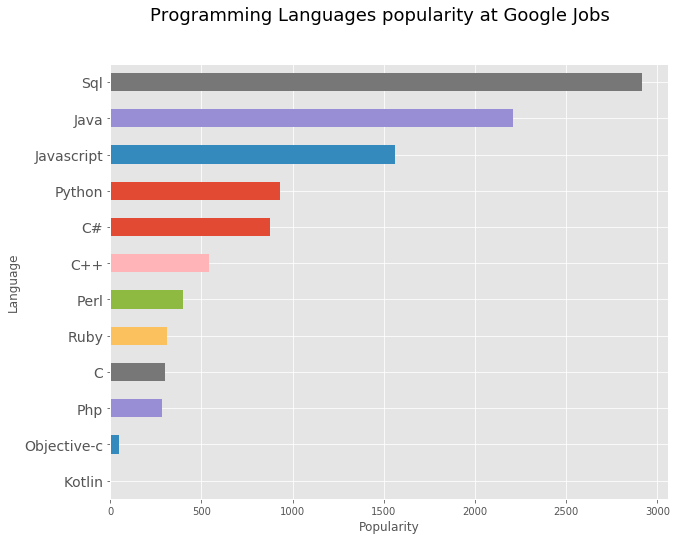

In [12]:
# plot
df_popular_programming_lang.plot.barh(x='Language',y='Popularity',figsize=(10,8), legend=False)
# add a suptitle
plt.suptitle("Programming Languages popularity at Google Jobs", fontsize=18)
# set xlabel to ""
plt.xlabel("Popularity")
# change xticks fontsize to 14
plt.yticks(fontsize=14)
# finally show the plot
plt.show()

In [18]:
# most popular language list 
title_list = ['software', 'sap', 'devops', 'security', 'frontend', 'quality', 'stack', 'developer','systems','manager', 'designer','analyst']


In [14]:
# get our Minimum Qualifications column and convert all of the values to a list
titles = df_job_skills['jobtitle'].tolist()
# let's join our list to a single string and lower case the letter
titles_string = "".join(str(v) for v in titles).lower()

In [19]:
# find out which language occurs in most in minimum Qualifications string
wordcount = dict((x,0) for x in title_list)
for w in re.findall(r"[\w'+#-]+|[.!?;’]", titles_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'software': 986, 'sap': 139, 'devops': 146, 'security': 614, 'frontend': 16, 'quality': 116, 'stack': 255, 'developer': 1793, 'systems': 615, 'manager': 853, 'designer': 89, 'analyst': 906}


In [20]:
# sort the dict
title_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

print(title_popularity)

[('developer', 1793), ('software', 986), ('analyst', 906), ('manager', 853), ('systems', 615), ('security', 614), ('stack', 255), ('devops', 146), ('sap', 139), ('quality', 116), ('designer', 89), ('frontend', 16)]


In [21]:
# make a new dataframe using programming_language_popularity for easy use cases
df_title = pd.DataFrame(title_popularity,columns=['Title','Popularity'])
# Capitalize each programming language first letter
df_title['Title'] = df_title.Title.str.capitalize()
df_title = df_title[::-1]

print(df_title)

        Title  Popularity
11   Frontend          16
10   Designer          89
9     Quality         116
8         Sap         139
7      Devops         146
6       Stack         255
5    Security         614
4     Systems         615
3     Manager         853
2     Analyst         906
1    Software         986
0   Developer        1793


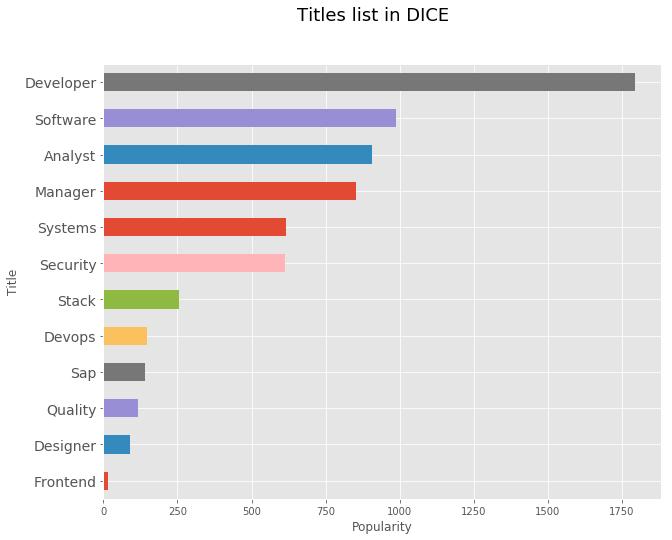

In [23]:
# plot
df_title.plot.barh(x='Title', y='Popularity', figsize=(10,8), legend=False)
# add a suptitle
plt.suptitle("Titles list in DICE", fontsize=18)
# set xlabel to ""
plt.xlabel("Popularity")
# change xticks fontsize to 14
plt.yticks(fontsize=14)
# finally show the plot
plt.show()